In [1]:
import torch as th
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from trainer import ema
sns.set_context('poster')
sns.set_style('whitegrid')
#sns.set_palette(sns.color_palette("Paired", n_colors=8, desat=.7))

In [11]:
from glob import glob
recent_trainers = [
    th.load('saved/ENCODE-halved-selu-adam/0001/trainer'),
    th.load('saved/ENCODE-selu-adam/0001/trainer'),
    th.load('saved/SKIP-RES-halved-selu-adam/0001/trainer'),
    th.load('saved/SKIP-RES-selu-adam/0001/trainer'),
    th.load('saved/SKIP-FCN-halved-selu-adam/0001/trainer'),
    th.load('saved/SKIP-FCN-selu-adam/0001/trainer'),
    th.load('saved/SKIP-FCN-double-selu-adam/0001/trainer'),
]

In [ ]:
#%matplotlib notebook
ALPHA = 0.05
sns.set_palette(sns.color_palette("Paired", n_colors=14, desat=.8))
def add_plot(T, alpha=ALPHA):
    plt.plot(ema(th.cat(T.test_F1)[:, -1], alpha), 
             label=T.path[6:-5]+' max: %.4f'%T.test_highscore)
    
plt.close()
plt.title('TEST F1 (mean), ema=%.0e' % ALPHA)
for T in recent_trainers:
    add_plot(T)
plt.xlabel('epochs')
plt.ylabel('Test F1 accuracy')
plt.legend(loc='lower center', ncol=1)
plt.show()

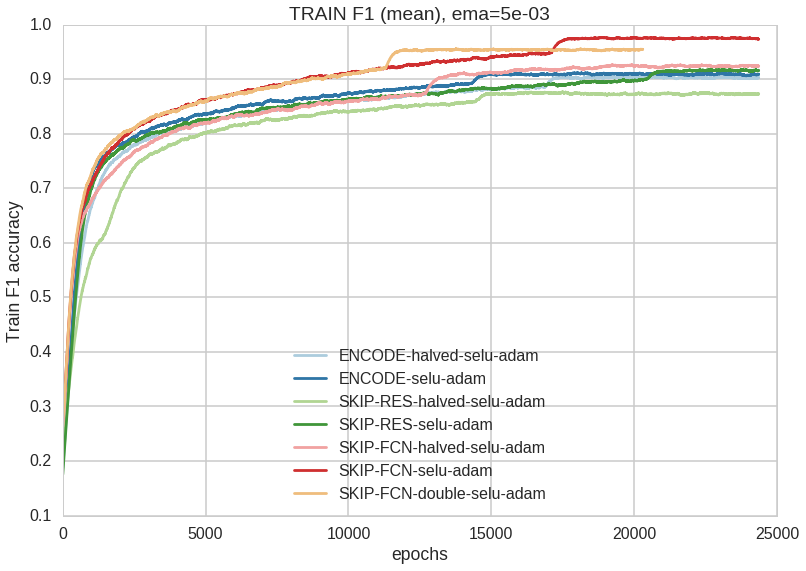

In [13]:
#%matplotlib notebook
ALPHA = 0.005
#FROM = 3000
#FROM = 0
sns.set_palette(sns.color_palette("Paired", n_colors=14, desat=.8))
def add_plot(T, alpha=ALPHA):
    plt.plot(ema(th.cat(T.train_F1)[:, -1], alpha), 
             label=T.path[6:-5])
    
plt.close()
plt.title('TRAIN F1 (mean), ema=%.0e' % ALPHA)
for T in recent_trainers:
    add_plot(T)
#plt.xticks(np.linspace(FROM, 25000, 6).astype(int))
plt.xlabel('epochs')
plt.ylabel('Train F1 accuracy')
plt.legend(loc='lower center', ncol=1)
plt.show()

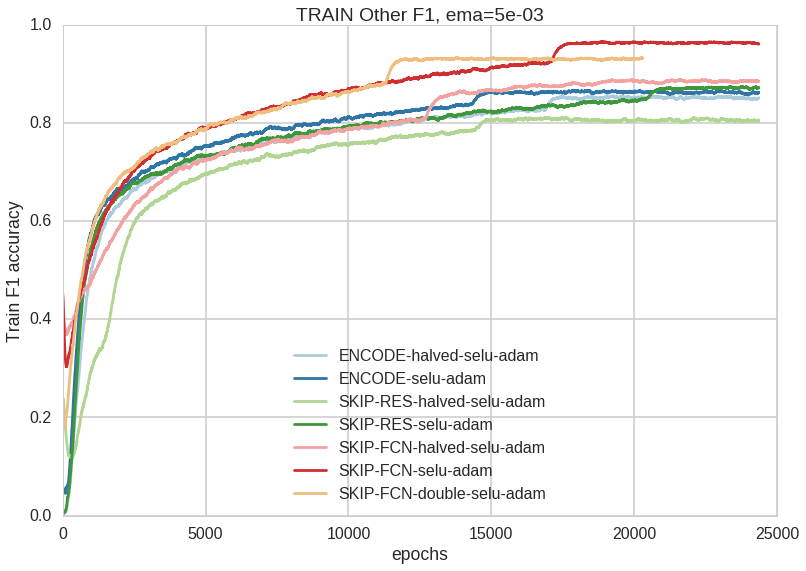

In [14]:
#%matplotlib notebook
ALPHA = 0.005
#FROM = 3000
#FROM = 0
sns.set_palette(sns.color_palette("Paired", n_colors=14, desat=.8))
def add_plot(T, alpha=ALPHA):
    plt.plot(ema(th.cat(T.train_F1)[:, 2], alpha), 
             label=T.path[6:-5])
    
plt.close()
plt.title('TRAIN Other F1, ema=%.0e' % ALPHA)
for T in recent_trainers:
    add_plot(T)
#plt.xticks(np.linspace(FROM, 25000, 6).astype(int))
plt.xlabel('epochs')
plt.ylabel('Train F1 accuracy')
plt.legend(loc='lower center', ncol=1)
plt.show()

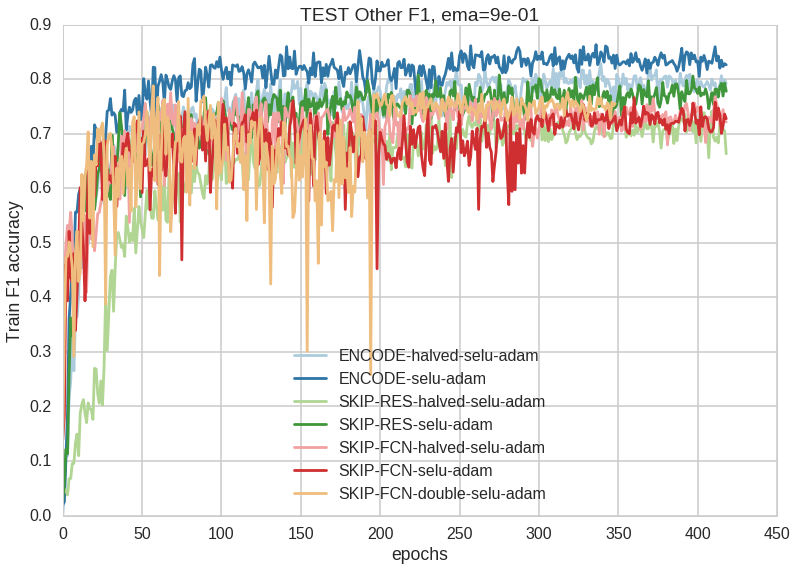

In [15]:
#%matplotlib notebook
ALPHA = 0.9
#FROM = 3000
#FROM = 0
sns.set_palette(sns.color_palette("Paired", n_colors=14, desat=.8))
def add_plot(T, alpha=ALPHA):
    plt.plot(ema(th.cat(T.test_F1)[:, 2], alpha), 
             label=T.path[6:-5])
    
plt.close()
plt.title('TEST Other F1, ema=%.0e' % ALPHA)
for T in recent_trainers:
    add_plot(T)
#plt.xticks(np.linspace(FROM, 25000, 6).astype(int))
plt.xlabel('epochs')
plt.ylabel('Train F1 accuracy')
plt.legend(loc='lower center', ncol=1)
plt.show()

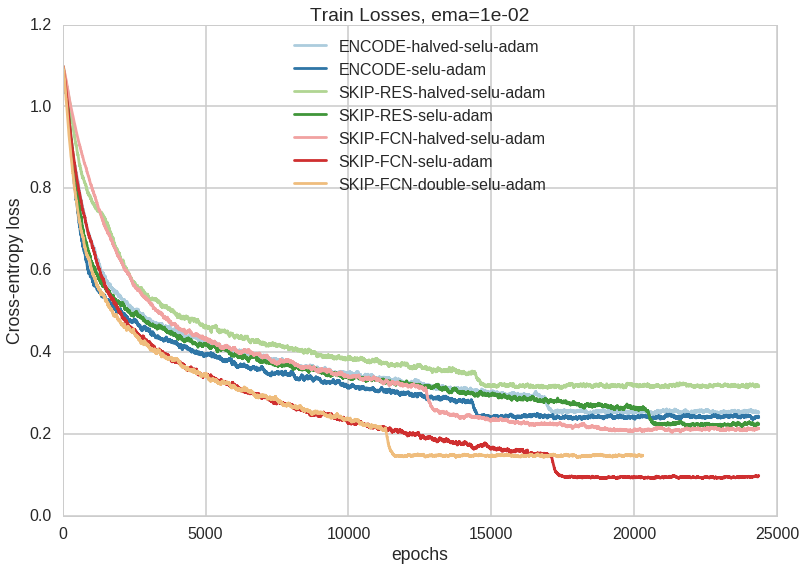

In [18]:
#%matplotlib notebook
ALPHA = 0.01
sns.set_palette(sns.color_palette("Paired", n_colors=14, desat=.8))
def add_plot(T, alpha=ALPHA):
    plt.plot(ema(T.losses, alpha), label=T.path[6:-5])
    
plt.close()
plt.title('Train Losses, ema=%.0e' % ALPHA)
for T in recent_trainers:
    add_plot(T)
#plt.xticks(np.linspace(FROM, 450, 10).astype(int))
plt.xlabel('epochs')
plt.ylabel('Cross-entropy loss')
plt.legend(loc='upper center', ncol=1)
plt.show()

In [86]:
from glob import glob
all_trainers = []
for i, t_path in enumerate(glob('saved/**/trainer', recursive=True)):
    print(i, t_path)
    all_trainers.append(th.load(t_path))

0 saved/SGD-dilvgg-nodense/0001/trainer
1 saved/SGD-dilvgg/0001/trainer
2 saved/SGD-halved-dilvgg-nodense/0001/trainer
3 saved/ADAM-dilvgg-nodense/0001/trainer
4 saved/SGD-halved-dilvgg/0001/trainer
5 saved/ADAM-dilvgg/0001/trainer
6 saved/ADAM-halved-dilvgg-nodense/0001/trainer
7 saved/ADAM-halved-dilvgg/0001/trainer
8 saved/RELU-19/0001/trainer
9 saved/RELU-19-halved/0001/trainer
10 saved/RELU-19-halved/0003/trainer
11 saved/RELU-16-double/0001/trainer
12 saved/RELU-16-quart/0001/trainer
13 saved/SELU-19/0001/trainer
14 saved/SELU-19-halved/0001/trainer
15 saved/SELU-16-double/0001/trainer
16 saved/SELU-16-quart/0001/trainer
17 saved/ADAM-SELU-16-quart/0001/trainer
18 saved/ADAM-SELU-16-quart/0003/trainer
19 saved/ADAM-RELU-19-halved/0001/trainer
20 saved/ADAM-RELU-19-halved/0003/trainer
21 saved/ADAM-SELU-19-halved/0001/trainer
22 saved/ADAM-SELU-19-halved/0003/trainer
23 saved/ADAM-RELU-16-quart/0001/trainer
24 saved/ADAM-RELU-16-quart/0003/trainer
25 saved/ADAM-SELU-19/0001/traine

In [100]:
all_trainers.sort(key=lambda x: -x.test_highscore)
print('#', '  F1   @ ep.', '      trial', sep='\t')
for i, T in enumerate(all_trainers, 1):
    print(i, '%.4f @ %3d'%(T.test_highscore, T.highscore_epoch), T.path[6:-5], sep='\t')
    

#	  F1   @ ep.	      trial
1	0.9297 @ 337	ENCODE-selu-adam
2	0.9114 @ 316	ENCODE-halved-selu-adam
3	0.9017 @ 248	SKIP-RES-selu-adam
4	0.8874 @  93	SGD-dilvgg-nodense
5	0.8871 @  51	ADAM-halved-dilvgg
6	0.8770 @ 331	ADAM-SELU-19-halved
7	0.8761 @ 422	ADAM-dilvgg-nodense
8	0.8732 @  31	ADAM-RELU-16-double
9	0.8731 @ 283	ADAM-SELU-16-double
10	0.8714 @  90	SKIP-FCN-double-selu-adam
11	0.8710 @  64	ADAM-RELU-19-halved
12	0.8649 @  79	ADAM-RELU-19
13	0.8633 @  86	ADAM-halved-dilvgg-nodense
14	0.8633 @ 142	SGD-halved-dilvgg-nodense
15	0.8611 @ 409	RESNET-halved-K4N1-selu-adam
16	0.8580 @ 220	SKIP-FCN-halved-selu-adam
17	0.8579 @ 105	ADAM-SELU-19
18	0.8578 @  72	RESNET-K4N1-relu-adam
19	0.8559 @ 112	SELU-16-double
20	0.8542 @  73	ADAM-RELU-19
21	0.8536 @  42	ADAM-RELU-16-double
22	0.8526 @ 189	ADAM-SELU-16-quart
23	0.8476 @ 118	ADAM-SELU-16-quart
24	0.8475 @  79	ADAM-RELU-19-halved
25	0.8472 @ 128	SGD-dilvgg
26	0.8467 @ 144	SKIP-RES-halved-selu-adam
27	0.8449 @ 361	SKIP-FCN-selu-adam
28	0.842

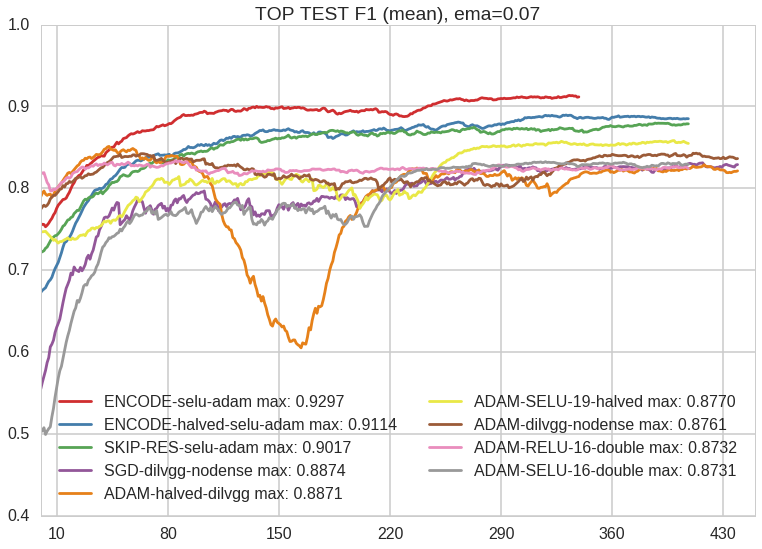

In [89]:
#%matplotlib notebook
sns.set_palette(sns.color_palette("Set1", n_colors=14, desat=.8))
def add_plot(T, alpha=0.07):
    plt.plot(ema(th.cat(T.test_F1)[10:450, -1], alpha), 
             label=T.path[6:-5]+' max: %.4f'%T.test_highscore)
    
plt.close()
plt.title('TOP TEST F1 (mean), ema=0.07')
for T in all_trainers[:9]:
    add_plot(T)
plt.xticks(range(10, 450, 70))
plt.legend(loc='lower center', ncol=2)
plt.show()

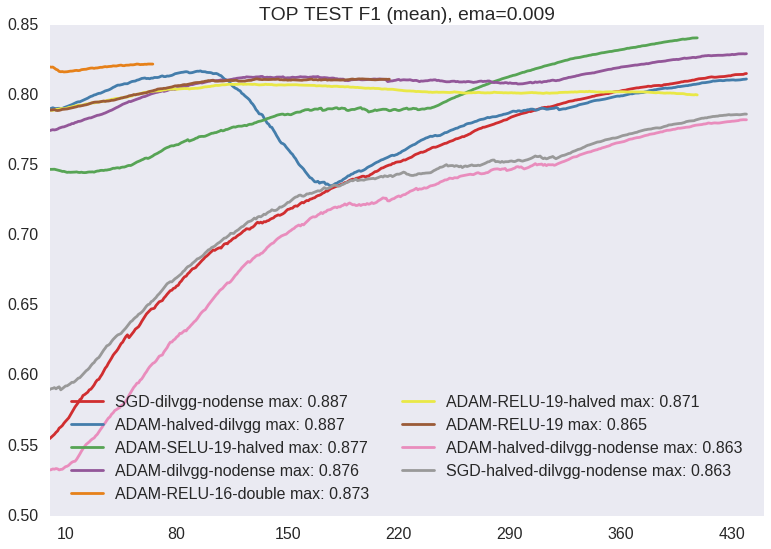

In [14]:
#%matplotlib notebook
sns.set_palette(sns.color_palette("Set1", n_colors=14, desat=.8))
def add_plot(T, alpha=0.009):
    plt.plot(ema(th.cat(T.test_F1)[10:450, -1], alpha), 
             label=T.path[6:-5]+' max: %.3f'%T.test_highscore)
    
plt.close()
plt.title('TOP TEST F1 (mean), ema=0.009')
for T in all_trainers[:9]:
    add_plot(T)
plt.xticks(range(10, 450, 70))
plt.legend(loc='lower center', ncol=2)
plt.show()

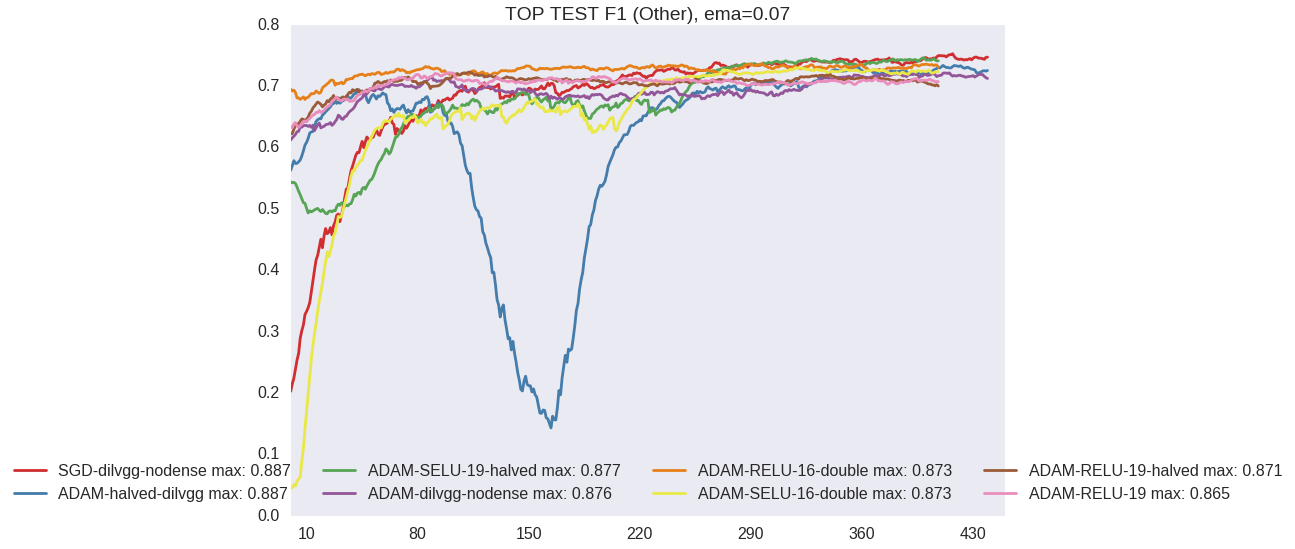

In [136]:
#%matplotlib notebook
sns.set_palette(sns.color_palette("Set1", n_colors=14, desat=.8))
def add_plot(T, alpha=0.07):
    plt.plot(ema(th.cat(T.test_F1)[10:450, 2], alpha), 
             label=T.path[6:-5]+' max: %.3f'%T.test_highscore)
    
plt.close()
plt.title('TOP TEST F1 (Other), ema=0.07')
for T in all_trainers[:8]:
    add_plot(T)
plt.xticks(range(10, 450, 70))
plt.legend(loc='lower center', ncol=4)
plt.show()

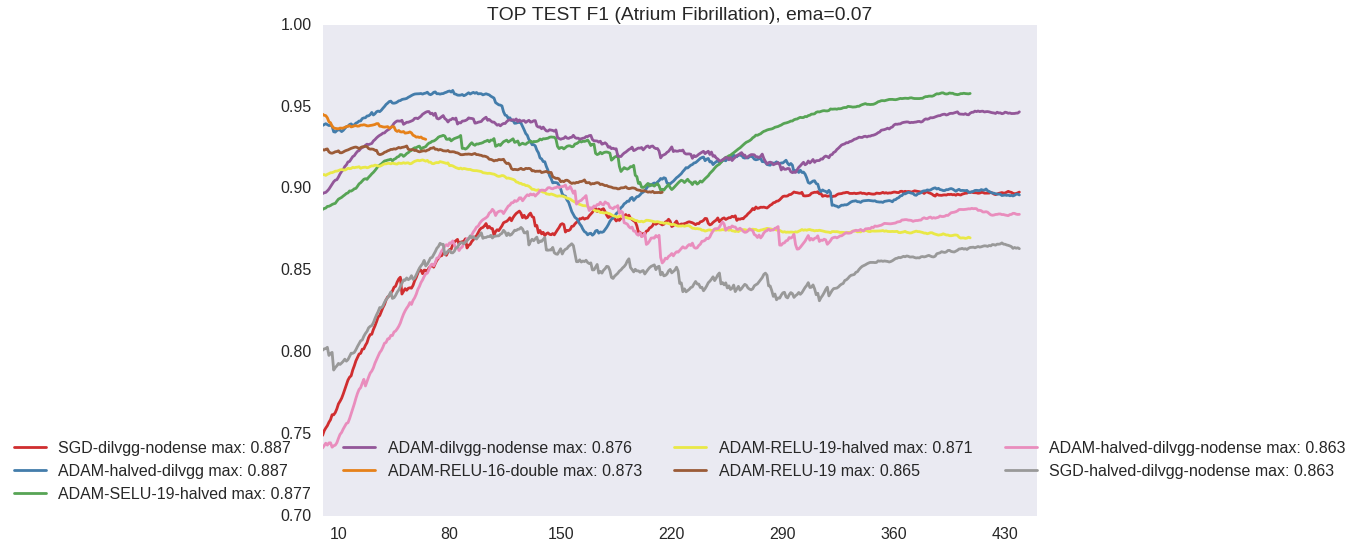

In [20]:
#%matplotlib notebook
sns.set_palette(sns.color_palette("Set1", n_colors=14, desat=.8))
def add_plot(T, alpha=0.02):
    plt.plot(ema(th.cat(T.test_F1)[10:450, 1], alpha), 
             label=T.path[6:-5]+' max: %.3f'%T.test_highscore)
    
plt.close()
plt.title('TOP TEST F1 (Atrium Fibrillation), ema=0.07')
for T in all_trainers[:9]:
    add_plot(T)
plt.xticks(range(10, 450, 70))
plt.legend(loc='lower center', ncol=4)
plt.show()

In [90]:
trial = 3
A = th.load('saved/ADAM-SELU-16-double/%04d/trainer'%trial)
B = th.load('saved/ADAM-RELU-16-double/%04d/trainer'%trial)
C = th.load('saved/ADAM-SELU-19-halved/%04d/trainer'%trial)
D = th.load('saved/ADAM-RELU-19-halved/%04d/trainer'%trial)
E = th.load('saved/ADAM-SELU-16-quart/%04d/trainer'%trial)
F = th.load('saved/ADAM-RELU-16-quart/%04d/trainer'%trial)
G = th.load('saved/ADAM-SELU-19/%04d/trainer'%trial)
H = th.load('saved/ADAM-RELU-19/%04d/trainer'%trial)

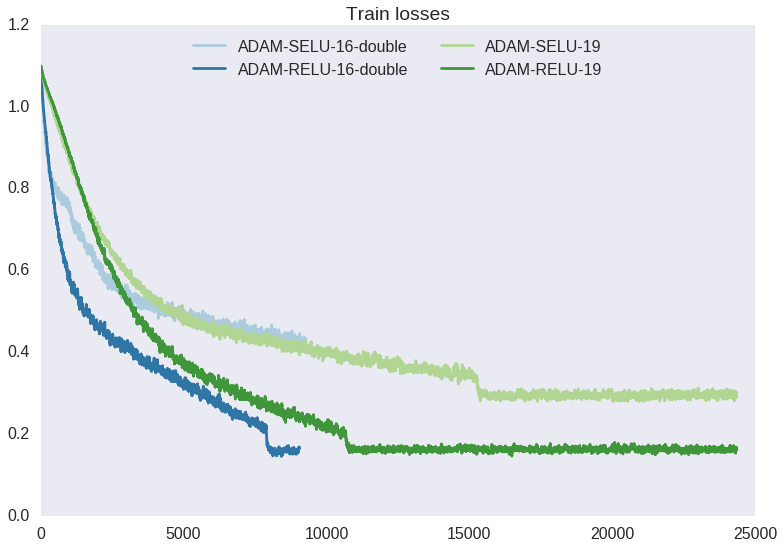

In [91]:
def add_plot(T, alpha=0.05):
    sns.set_palette(sns.color_palette("Paired", n_colors=8))
    plt.plot(ema(T.losses, alpha), label=T.path[6:-5])
    
plt.close()
plt.title('Train losses')
for T in A, B, G, H:
    add_plot(T)
plt.legend(loc='upper center', ncol=2)
plt.show()

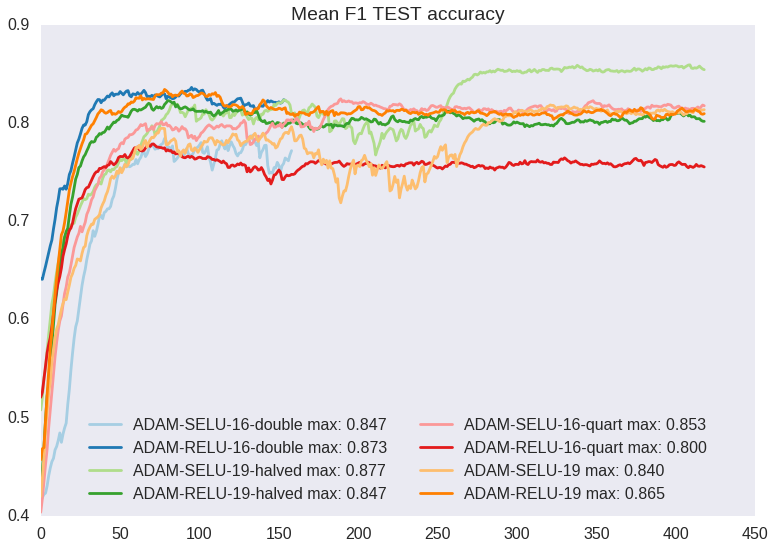

In [92]:
#%matplotlib notebook
def add_plot(T, alpha=0.1):
    sns.set_palette(sns.color_palette("Paired", n_colors=8, desat=.5))
    plt.plot(ema(th.cat(T.test_F1)[:, -1], alpha), 
             label=T.path[6:-5]+' max: %.3f'%T.test_highscore)
    
plt.close()
plt.title('Mean F1 TEST accuracy')
for T in A, B, C, D, E, F, G, H:
    add_plot(T)
plt.legend(loc='lower center', ncol=2)
plt.show()

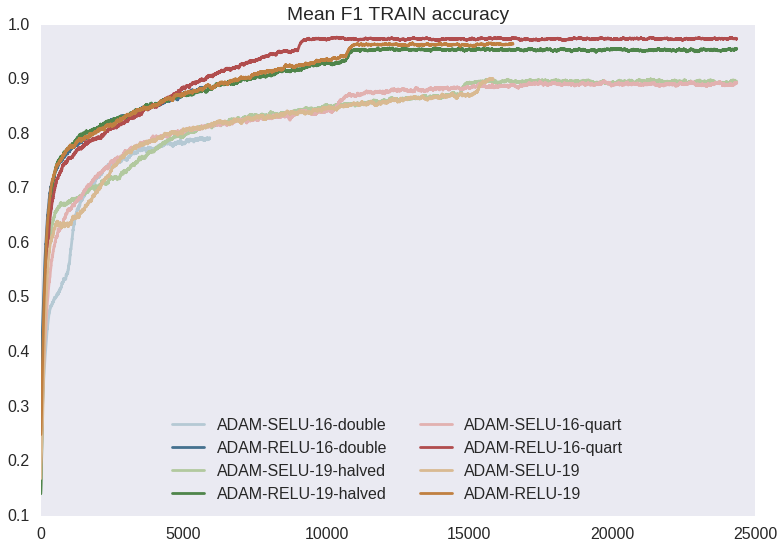

In [45]:
def add_plot(T, alpha=0.01):
    sns.set_palette(sns.color_palette("Paired", n_colors=8, desat=.5))
    plt.plot(ema(th.cat(T.train_F1)[:, -1], alpha), label=T.path[6:-5])
    
plt.close()
plt.title('Mean F1 TRAIN accuracy')
for T in A, B, C, D, E, F, G, H:
    add_plot(T)
plt.legend(loc='lower center', ncol=2)
plt.show()

In [61]:
 th.cat(T.test_F1)[, -2].size()

torch.Size([418])

In [67]:
len(T.train_F1)

24360

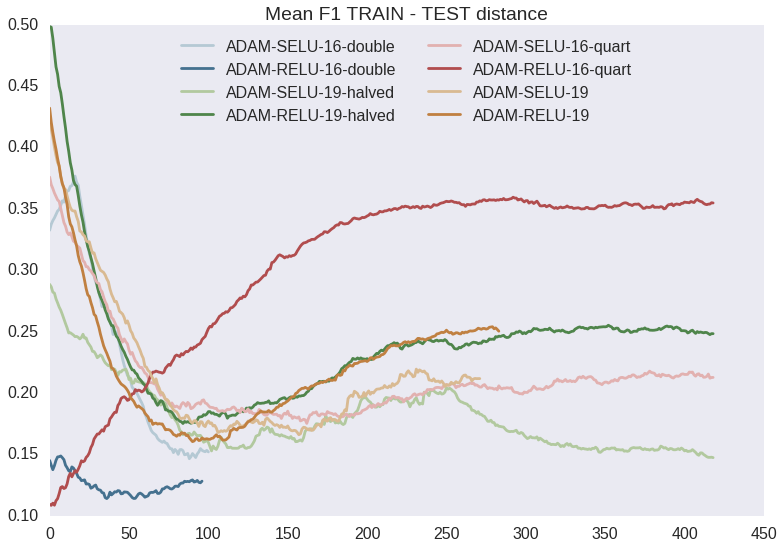

In [82]:
def add_plot(T, alpha=0.03):
    sns.set_palette(sns.color_palette("Paired", n_colors=8, desat=.5))
    plt.plot(ema(th.cat(T.train_F1)[57::58, -1][:-1] - th.cat(T.test_F1)[:, -2], alpha), label=T.path[6:-5])
    
plt.close()
plt.title('Mean F1 TRAIN - TEST distance')
for T in A, B, C, D, E, F, G, H:
    add_plot(T)
plt.legend(loc='upper center', ncol=2)
plt.show()

In [36]:
def plot(T):
    
    sns.set_palette(sns.color_palette("Set1", n_colors=4, desat=.7))
    plt.close()
    print(T.path)
    f1, f2, f3 = T.plot(.01, .01, .1)
    plt.title('Test accuracy  ' + T.path)
    plt.show()
    return T

saved/ADAM-SELU-16-double/0003


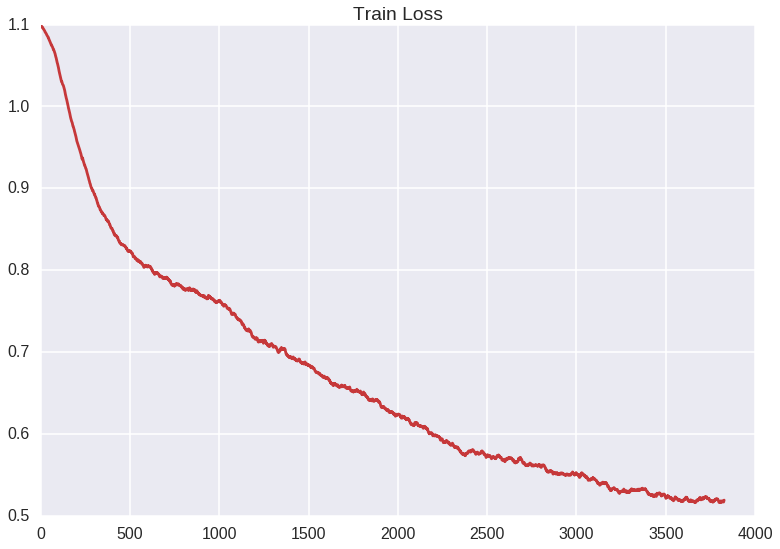

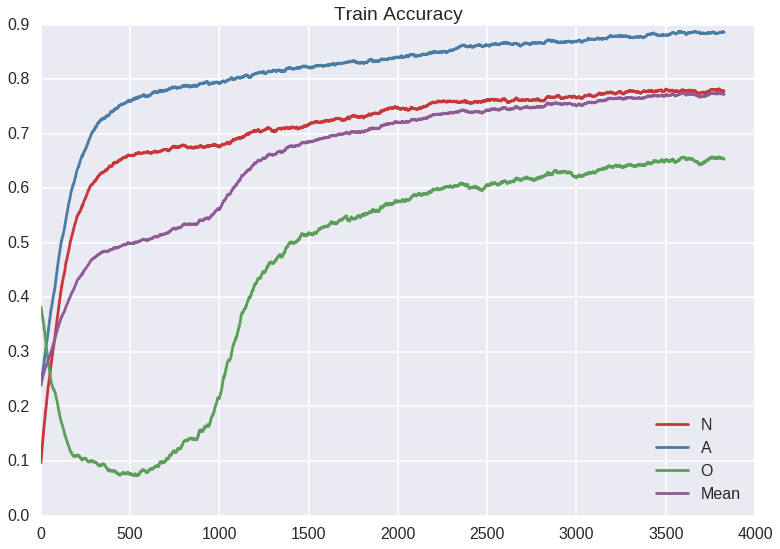

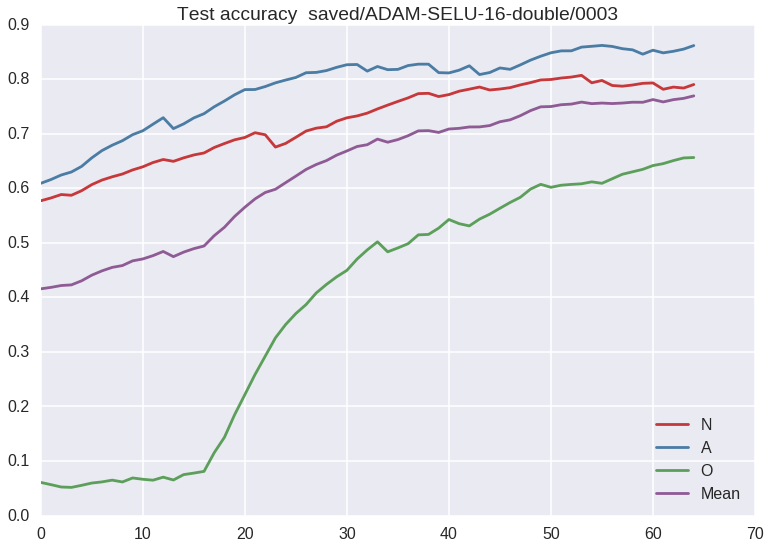

In [150]:
plot(A)
    

saved/ADAM-RELU-16-double/0003


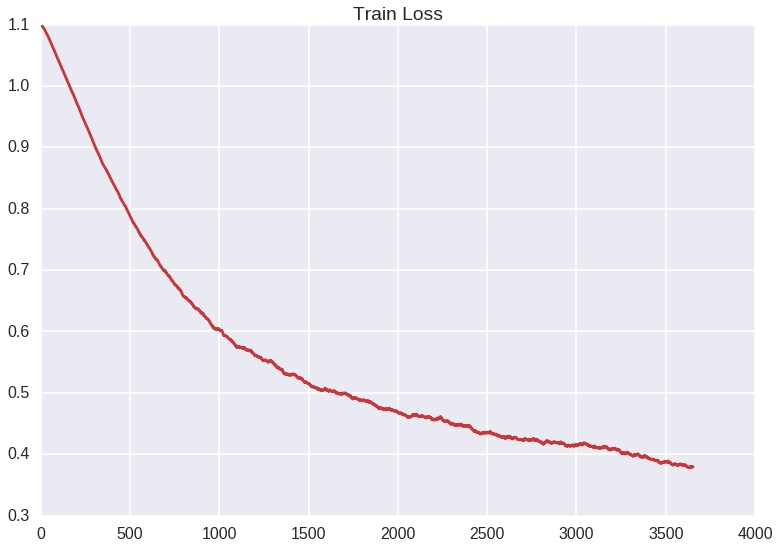

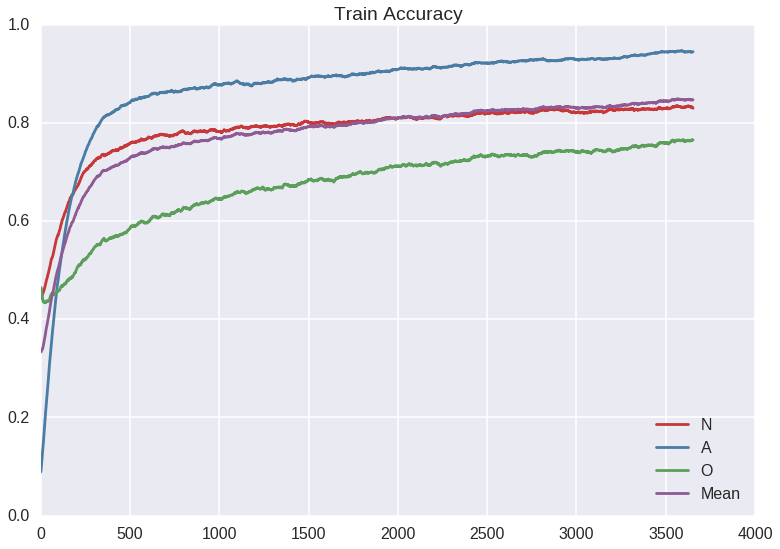

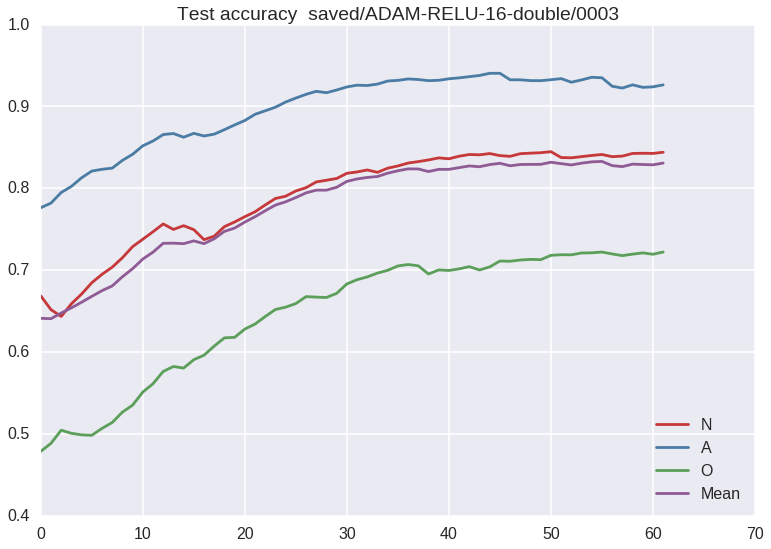

In [151]:
plot(B)
    

saved/ADAM-SELU-19-halved/0003


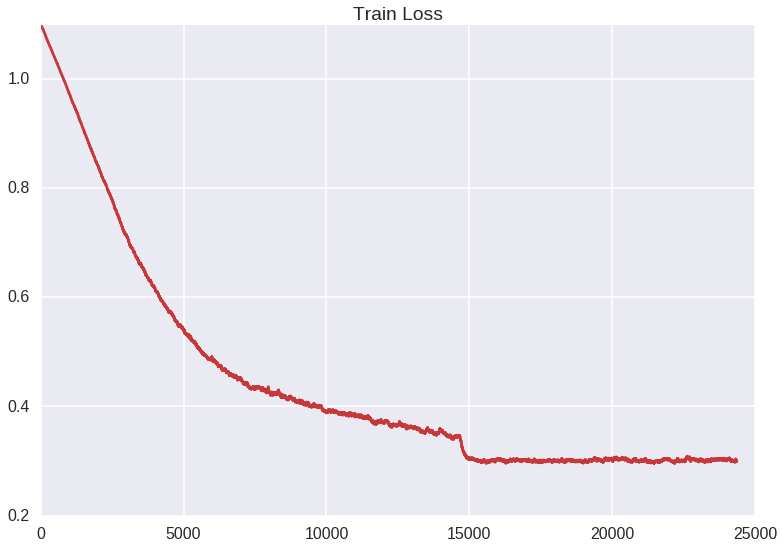

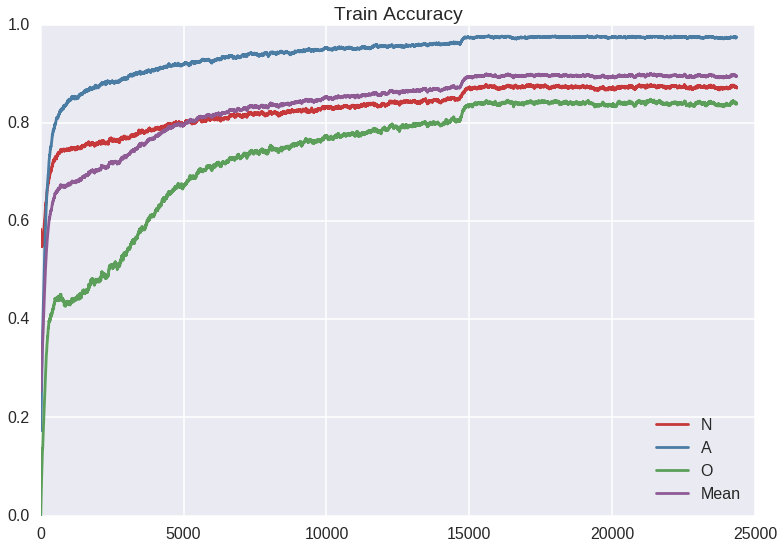

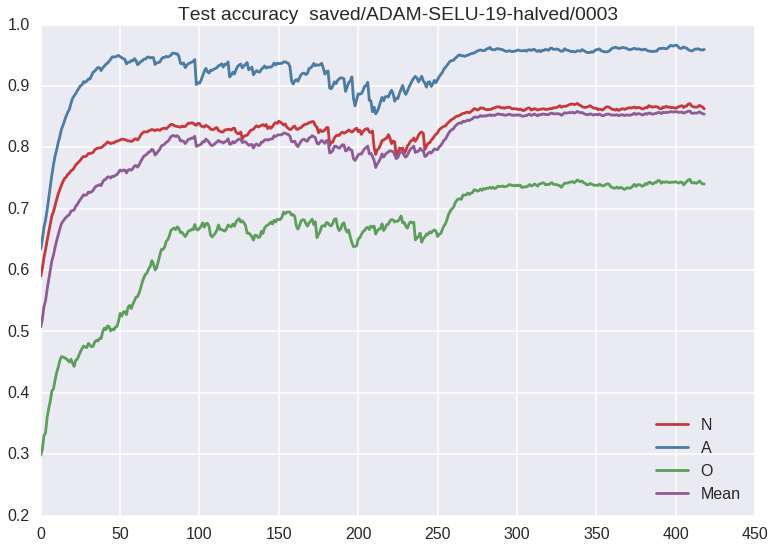

In [152]:
plot(C)
    

saved/ADAM-RELU-19-halved/0003


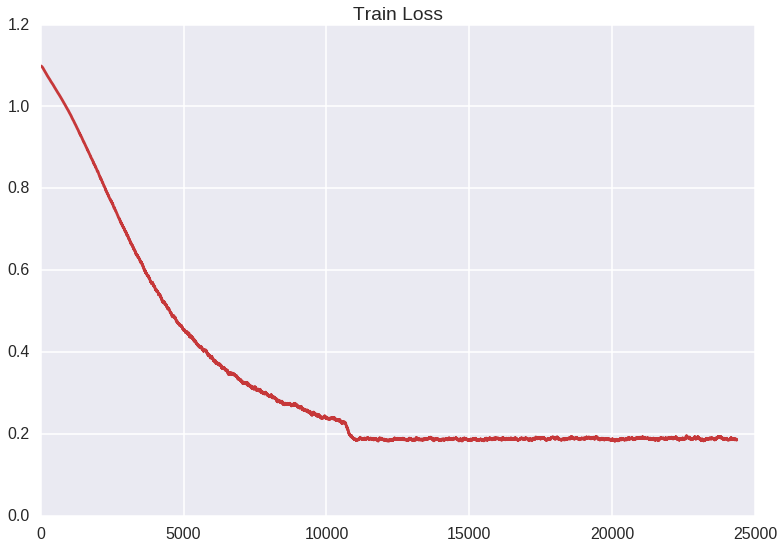

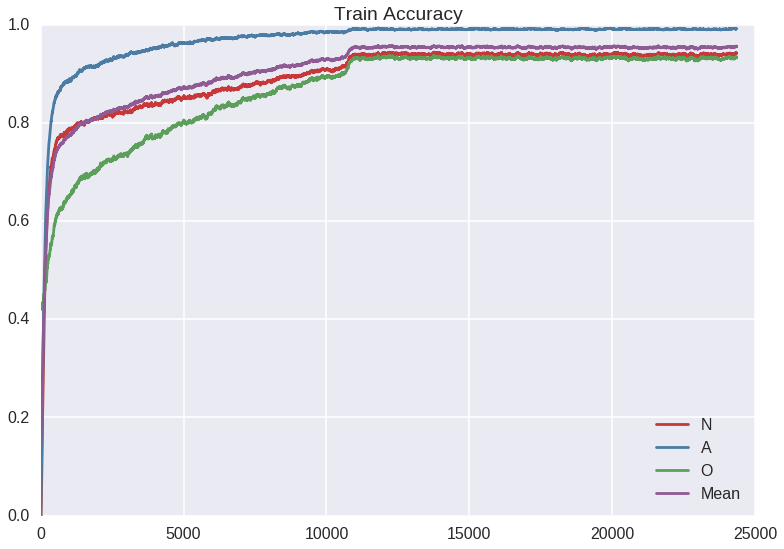

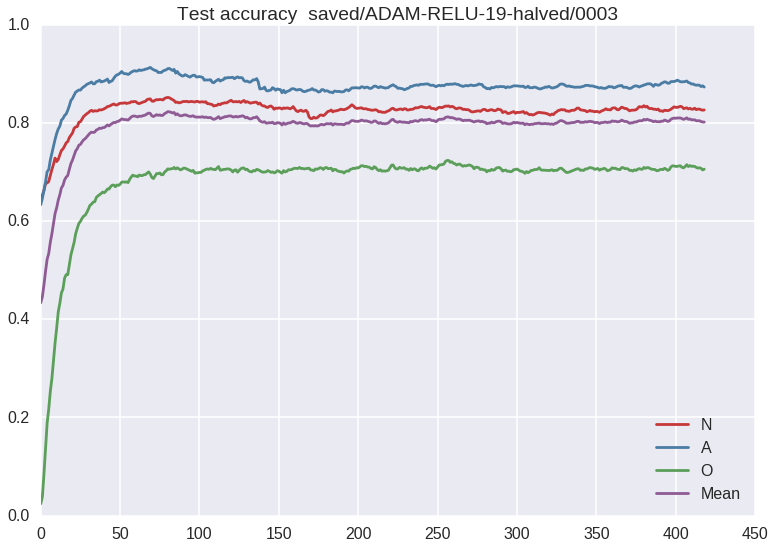

In [153]:
plot(D)
    

saved/ADAM-SELU-16-quart/0003


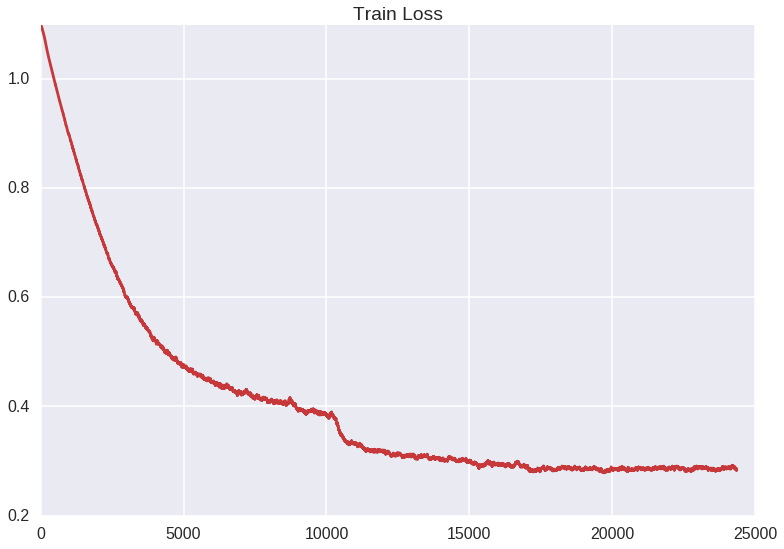

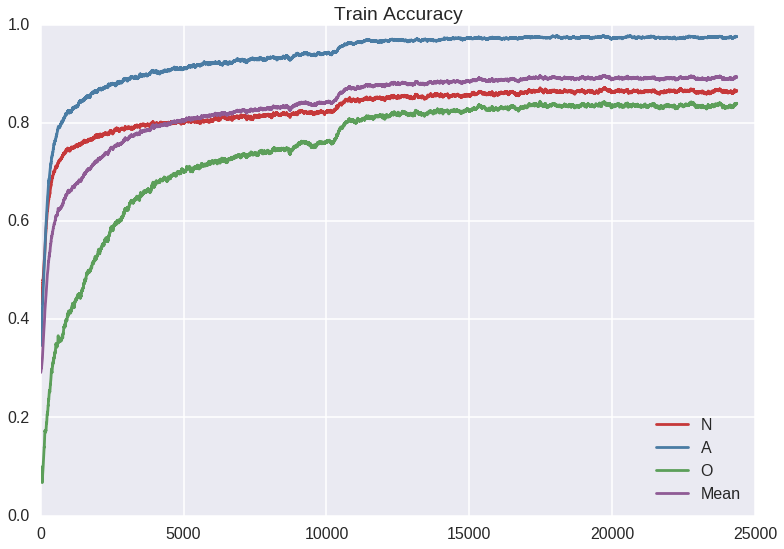

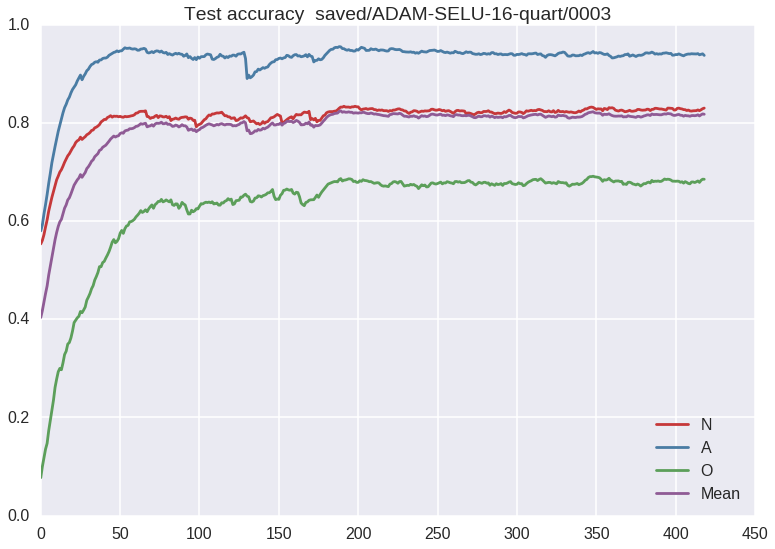

In [154]:
plot(E)
    

saved/ADAM-RELU-16-quart/0003


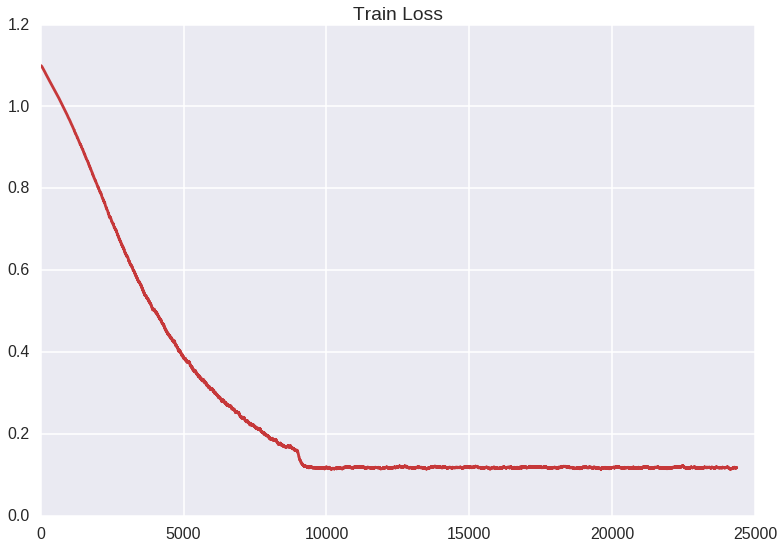

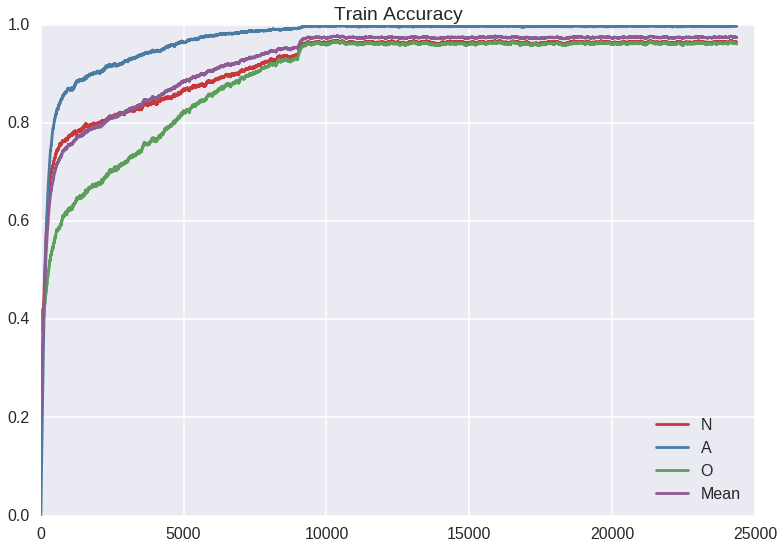

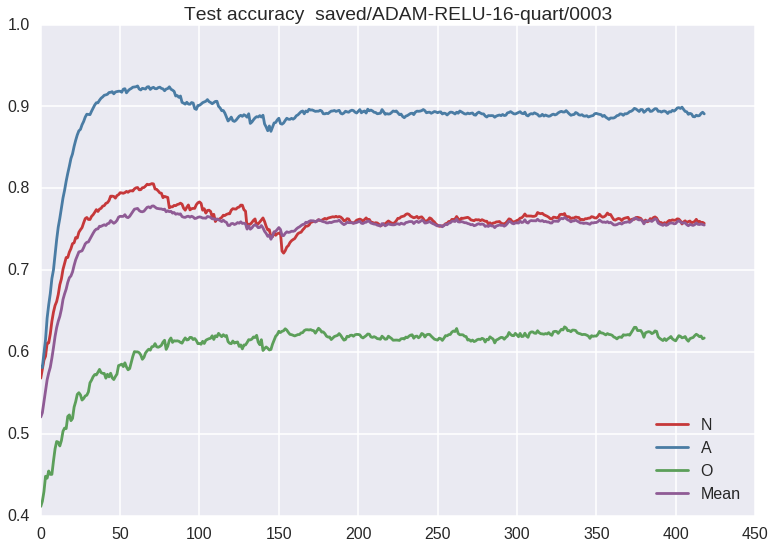

In [155]:
plot(F)
    

saved/ADAM-SELU-19/0003


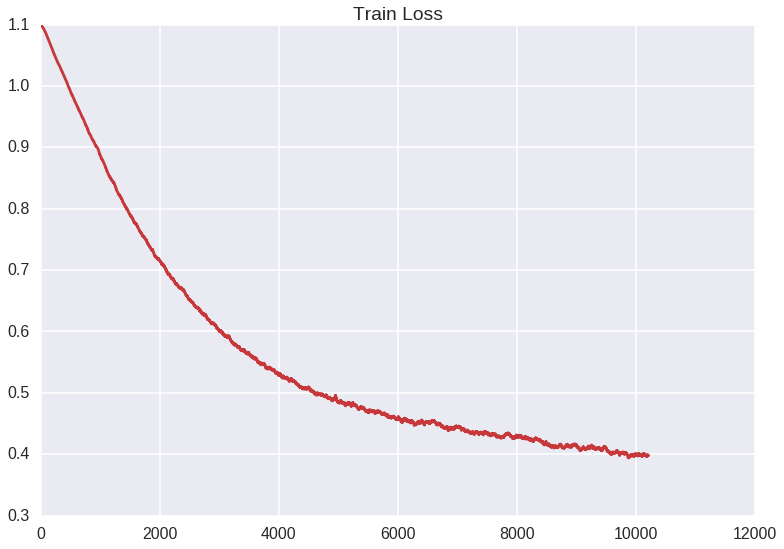

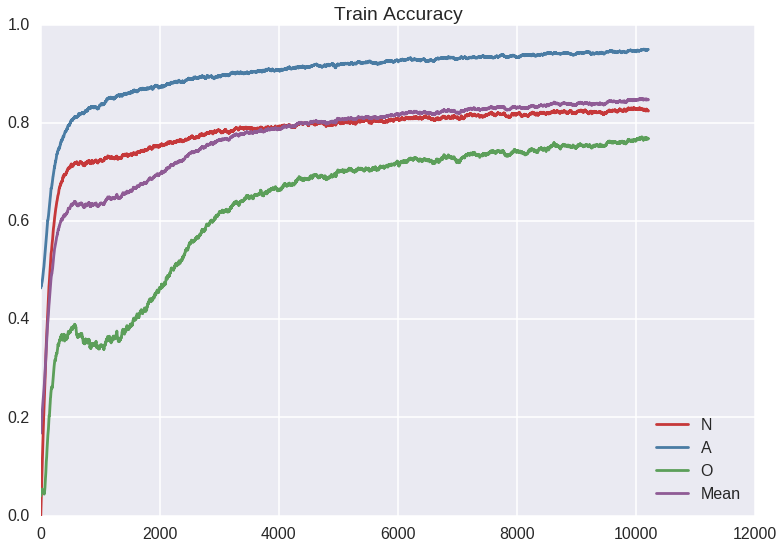

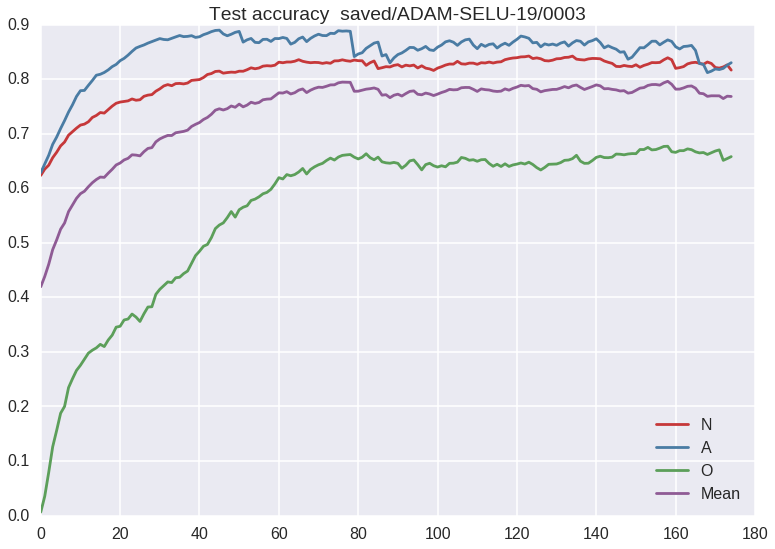

In [156]:
plot(G)
    

saved/ADAM-RELU-19/0003


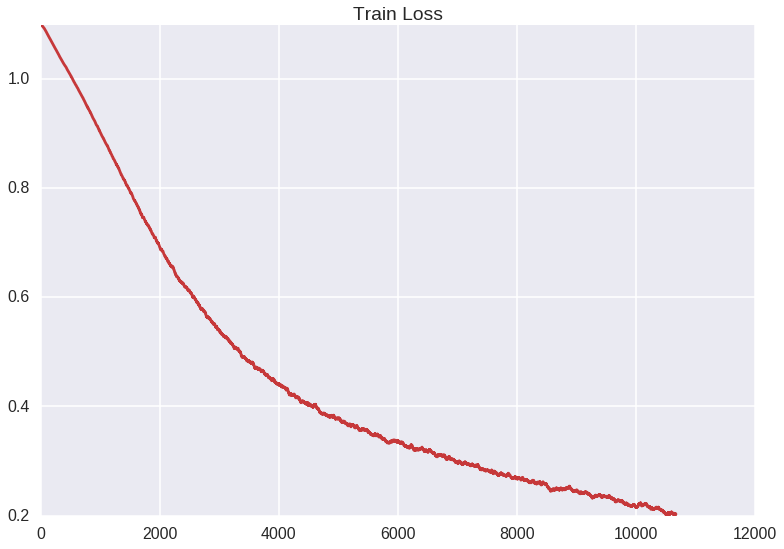

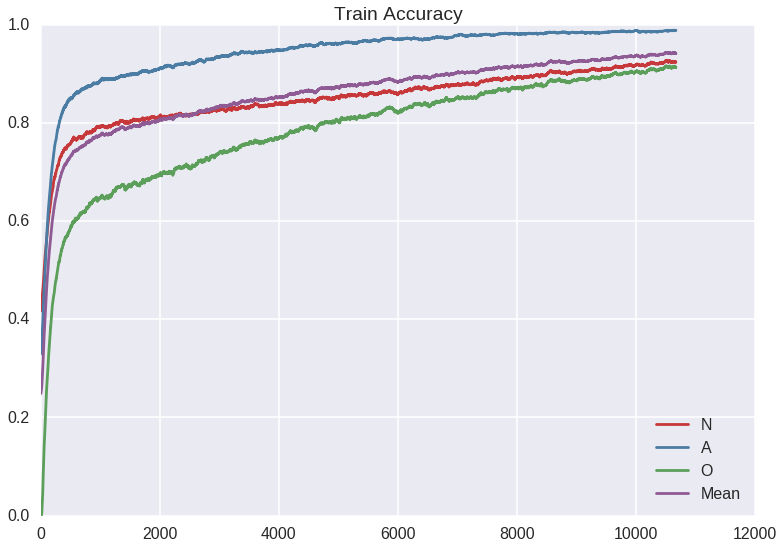

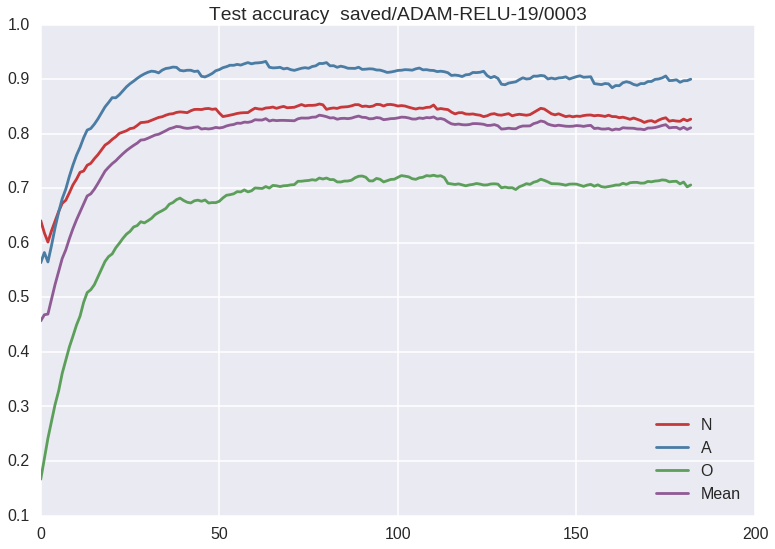

In [157]:
plot(H)
    

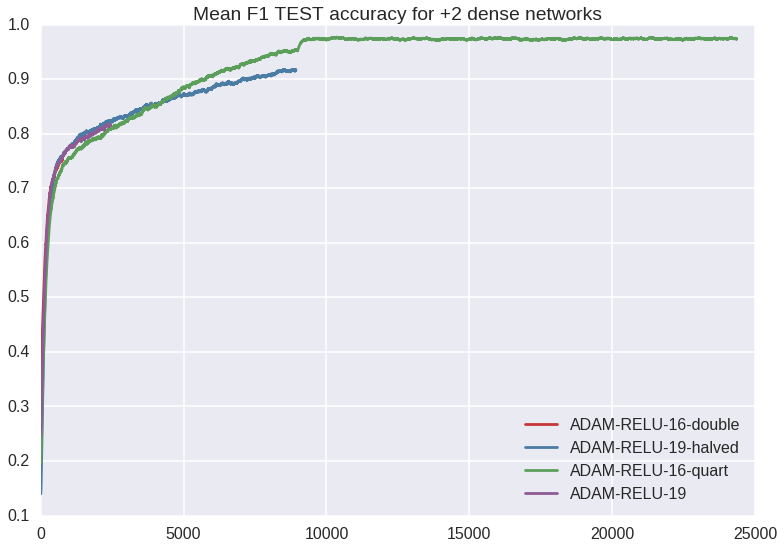

In [43]:
# plt.close()
plt.title('Mean F1 TEST accuracy for +2 dense networks')
add_plot(B)
add_plot(D)
add_plot(F)
add_plot(H)
plt.legend(loc='lower right')
plt.show()

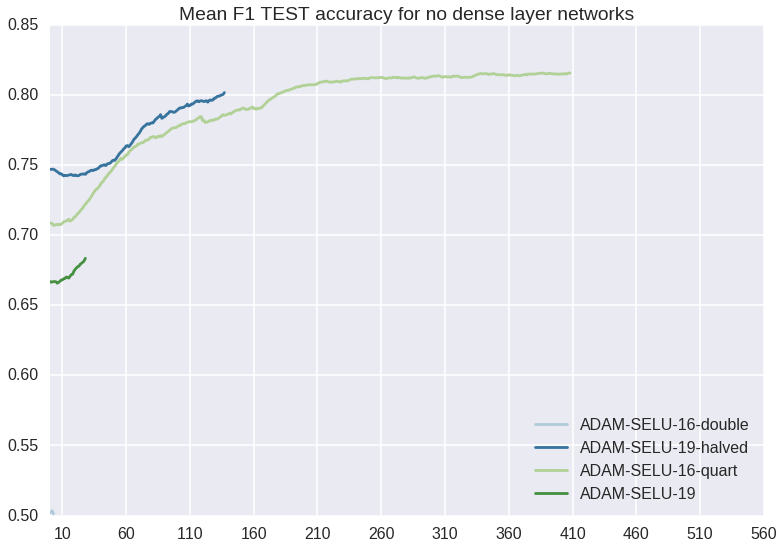

In [44]:
def add_plot(T, alpha=0.02):
    plt.plot(ema(th.cat(T.test_F1)[10:600, -1], alpha), label=T.path[6:-5])
plt.close()
plt.title('Mean F1 TEST accuracy for no dense layer networks')
add_plot(A)
add_plot(C)
add_plot(E)
add_plot(G)
plt.legend(loc='lower right')
plt.xticks(range(10, 600, 50))
plt.show()

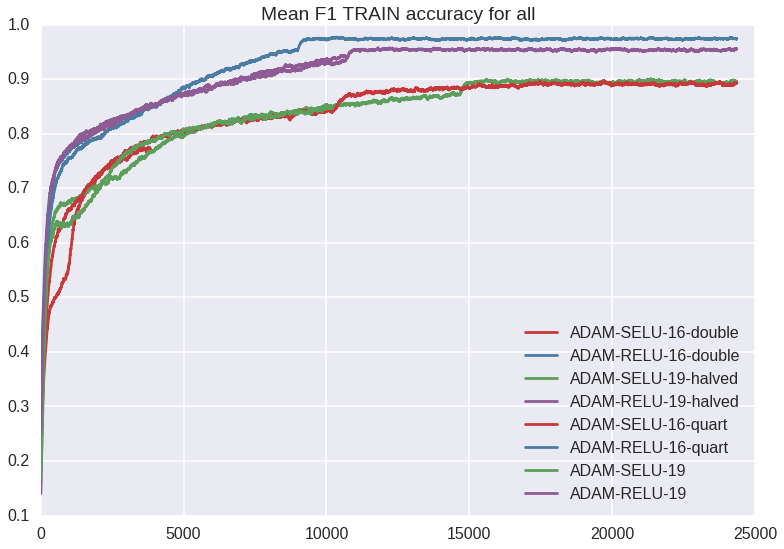

In [158]:
plt.close()
plt.title('Mean F1 TRAIN accuracy for all')
def add_plot(T, alpha=0.01):
    plt.plot(ema(th.cat(T.train_F1)[:, -1], alpha), label=T.path[6:-5])

for T in A, B, C, D, E, F, G, H:
    add_plot(T)
    
plt.legend(loc='lower right')
plt.show()